## Statsmodels version 0.13.5 is required for dcurves
pip install statsmodels==0.13.5



In [ ]:
pip install statsmodels==0.13.5

In [ ]:
pip install dcurves

In [ ]:
pip install lifelines

In [ ]:
pip install scipy==1.8.0

In [1]:
import pandas as pd
import joblib
import lifelines
import statsmodels
import dcurves
import numpy as np
from dcurves import dca, plot_graphs
import matplotlib.pyplot as plt

In [2]:
df_train = pd.read_csv('Miller_2023_train_DR_imputed.csv')
df_validate = pd.read_csv('Miller_2023_validate_DR_imputed.csv')

In [3]:
df_train['REC_GRAFT_STAT'].value_counts(normalize=True)

REC_GRAFT_STAT
0.0    0.695299
1.0    0.304701
Name: proportion, dtype: float64

In [4]:
# Assuming df1 and df2 are already defined with a 'REC_CTR_CD' column

# Get the unique recipient center codes in both dataframes
unique_df_train = set(df_train['REC_CTR_CD'])
unique_df_validate = set(df_validate['REC_CTR_CD'])

# Remove rows in df1 where REC_CTR_CD is not in df2
df_train_filtered = df_train[df_train['REC_CTR_CD'].isin(unique_df_validate)]

# Remove rows in df2 where REC_CTR_CD is not in df1
df_validate_filtered = df_validate[df_validate['REC_CTR_CD'].isin(unique_df_train)]

In [5]:
df_train = df_train_filtered

df_validate = df_validate_filtered

In [6]:
df_train.dropna(inplace=True)
df_validate.dropna(inplace=True)

In [7]:
df_train['Graft_Survival_Time'] = (df_train['Graft_Survival_Time'])/364
df_validate['Graft_Survival_Time'] = (df_validate['Graft_Survival_Time'])/364

In [8]:
from lifelines import CoxPHFitter

# Donor & Recipient Characteristics, including Race and HCV Status

In [9]:
# DONOR-RECIPIENT MODEL FITTED W/ RACE VARIABLE

cph = CoxPHFitter()

cph.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula = "DON_AGE + DON_RACE_SRTR + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_ANTI_HCV + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI "
    
)

Iteration 1: norm_delta = 3.43e-01, step_size = 0.9500, log_lik = -115082.00714, newton_decrement = 1.23e+03, seconds_since_start = 1.7
Iteration 2: norm_delta = 2.20e-02, step_size = 0.9500, log_lik = -113893.09189, newton_decrement = 4.70e+00, seconds_since_start = 3.4
Iteration 3: norm_delta = 1.29e-03, step_size = 0.9500, log_lik = -113888.36697, newton_decrement = 1.87e-02, seconds_since_start = 5.3
Iteration 4: norm_delta = 1.72e-06, step_size = 1.0000, log_lik = -113888.34821, newton_decrement = 4.45e-08, seconds_since_start = 7.2
Convergence success after 4 iterations.


<lifelines.CoxPHFitter: fitted with 67044 total observations, 46576 right-censored observations>

In [10]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 67044 total observations, 46576 right-censored observations>
             duration col = 'Graft_Survival_Time'
                event col = 'REC_GRAFT_STAT'
                   strata = REC_CTR_CD
      baseline estimation = breslow
   number of observations = 67044
number of events observed = 20468
   partial log-likelihood = -113888.35
         time fit was run = 2024-11-11 21:56:09 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
DON_AGE                         0.01      1.01      0.00            0.01            0.01                1.01                1.01
DON_RACE_SRTR                   0.16      1.17      0.02            0.12            0.20                1.12                1.22
DON_CREAT                       0.06      1.06      0.01            0.03            0.08                1.04                1.08
DON_HIST_HTN                    0.11      1.11      0.02            0.07            0.14                1.07                1.15
DON_HIST_DB                     0.10      1.11      0.03            0.04            0.17                1.04                1.18
DON_COD_DON_STROKE              0.08      1.08      0.02            0.04            0.11                1.04                1.12
DON_ANTI_HCV                    0.27      1.31      0.05            0.17            0.37                1.19                1.45
DON_HGT_CM                     -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
DON_WGT_KG                     -0.00      1.00      0.00           -0.01           -0.00                0.99                1.00
DON_CARDIAC_ARREST_AFTER_DEATH -0.26      0.77      0.06           -0.37           -0.14                0.69                0.87
REC_B_MM_EQUIV_TX              -0.01      0.99      0.01           -0.03            0.01                0.97                1.01
REC_DR_MM_EQUIV_TX              0.04      1.04      0.01            0.02            0.06                1.02                1.07
REC_COLD_ISCH_TM                0.01      1.01      0.00            0.01            0.01                1.01                1.01
EN_BLOC                        -0.11      0.90      0.07           -0.25            0.04                0.78                1.04
REC_AGE_AT_TX                  -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
REC_DIAB                        0.13      1.14      0.02            0.10            0.16                1.10                1.18
REC_HTN                         0.03      1.03      0.02           -0.01            0.07                0.99                1.07
CAN_RACE_SRTR                   0.26      1.30      0.02            0.23            0.29                1.25                1.34
REC_DGN                        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
CAN_PREV_TXFUS                  0.19      1.21      0.02            0.16            0.22                1.17                1.24
CAN_WGT_KG                      0.00      1.00      0.00            0.00            0.00                1.00                1.00
CAN_LAST_SRTR_PEAK_PRA          0.00      1.00      0.00            0.00            0.00                1.00                1.00
REC_DIAL_YRS                    0.01      1.01      0.00            0.01            0.02                1.01                1.02
CAN_ANGINA                     -0.17      0.85      0.02           -0.21           -0.12                0.81                0.89
CAN_PERIPH_VASC                 0.29      1.33      0.03            0.22            0.36                1.25                1.43
REC_HCV_STAT                    0.22      1.24      0.03            0.16            0.

In [11]:
# Graft Failure prediction at 5 years

cph_pred_vals = \
    cph.predict_survival_function(df_validate,
                                    times = [5])


                                   
df_validate['graft_failure_5_years'] = [1-val for val in cph_pred_vals.iloc[0,:]]

In [12]:
from dcurves import dca, plot_graphs

/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:154: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risks_df[modelname].replace(
/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:157: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

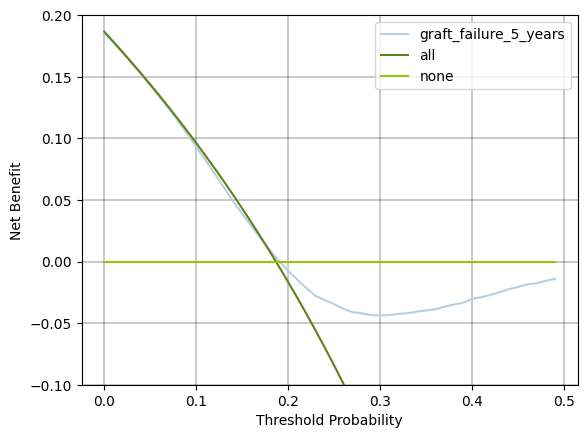

In [13]:
# Donor and Recipient Characteristics, With Race

stdca_coxph_results = \
          dca(
              data=df_validate,
              outcome='REC_GRAFT_STAT',
              modelnames=['graft_failure_5_years'],
              thresholds=np.arange(0, 0.5, 0.01),
              time=5,
              time_to_outcome_col='Graft_Survival_Time'
          )
  
plot_graphs(
    plot_df=stdca_coxph_results,
    graph_type='net_benefit',
    y_limits=[-0.1, 0.2]
  )

In [14]:
coefficients = cph.params_
print(coefficients)

covariate
DON_AGE                           0.012222
DON_RACE_SRTR                     0.160009
DON_CREAT                         0.058154
DON_HIST_HTN                      0.107797
DON_HIST_DB                       0.102371
DON_COD_DON_STROKE                0.076404
DON_ANTI_HCV                      0.272184
DON_HGT_CM                       -0.003856
DON_WGT_KG                       -0.004199
DON_CARDIAC_ARREST_AFTER_DEATH   -0.255506
REC_B_MM_EQUIV_TX                -0.013776
REC_DR_MM_EQUIV_TX                0.043853
REC_COLD_ISCH_TM                  0.010835
EN_BLOC                          -0.107823
REC_AGE_AT_TX                    -0.000350
REC_DIAB                          0.131724
REC_HTN                           0.026851
CAN_RACE_SRTR                     0.260066
REC_DGN                          -0.000032
CAN_PREV_TXFUS                    0.187876
CAN_WGT_KG                        0.001757
CAN_LAST_SRTR_PEAK_PRA            0.001531
REC_DIAL_YRS                      0.010374
C

In [15]:

# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

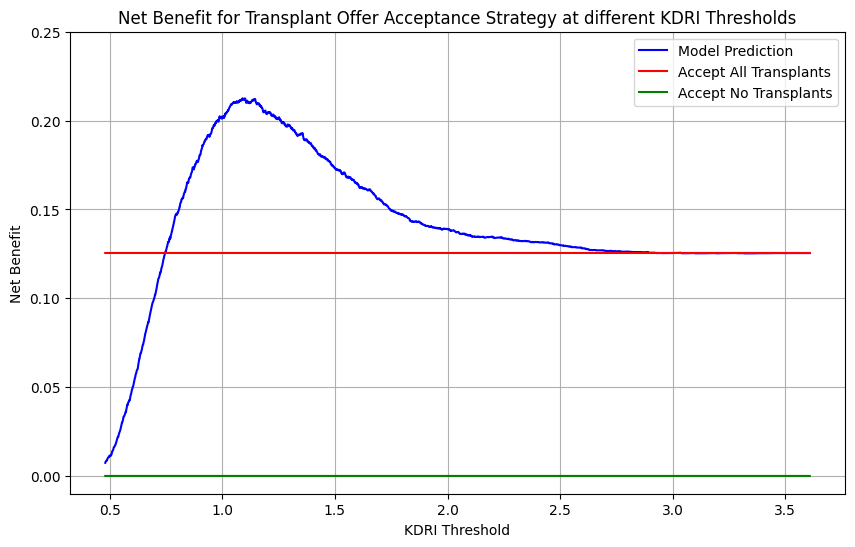

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set threshold range for KDRI
kdri_thresholds = np.arange(0.48, 3.61, 0.001)  # Thresholds to evaluate (based on 2010 OPTN mapp8ing table)
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefit values for each strategy
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Set the desired probability threshold for survival benefit (e.g., 83% threshold for net benefit calculation)
desired_probability = 0.83
odds_ratio = desired_probability / (1 - desired_probability)  # Converts 0.83 to an odds ratio

# Precompute total positives (graft survivals) and negatives (graft failures) in the data
total_negatives = df_validate['REC_GRAFT_STAT'].sum()  # Total graft failures
total_positives = N - total_negatives  # Total graft survivals

# Precompute "Accept All" net benefit value, since it doesn't change across thresholds
TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # Actual graft failures
net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * odds_ratio

# Loop over each threshold in kdri_thresholds
for threshold in kdri_thresholds:
    # Vectorized calculations for TP and FP based on the current threshold
    is_below_threshold = df_validate['KDRI'] < threshold
    TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # True Positives (survivals correctly identified)
    FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()  # False Positives (failures incorrectly predicted as survivals)

    # Calculate net benefit for model strategy at the current threshold
    net_benefit_model_value = (TP / N) - (FP / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # Store "Accept All" and "Accept None" values
    net_benefit_accept_all.append(net_benefit_accept_all_value)
    net_benefit_accept_none.append(0)  # Always zero for "Accept None" strategy

# Plot the results for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(kdri_thresholds, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(kdri_thresholds, net_benefit_accept_all, 'r-', label='Accept All Transplants')
plt.plot(kdri_thresholds, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("KDRI Threshold")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy at different KDRI Thresholds")
plt.ylim(-0.01, 0.25)
plt.legend()
plt.grid(True)
plt.show()


# Donor/Recipient without Race Term

In [22]:
df_train = df_validate.drop('DON_RACE_SRTR', axis=1)
df_validate = df_validate.drop('DON_RACE_SRTR', axis=1)

In [23]:
from lifelines import CoxPHFitter

In [24]:
# Donor Recipient model without race term

cph1 = CoxPHFitter()

cph1.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula=( "DON_AGE  + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_ANTI_HCV + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI")
)

cph1.print_summary()

Iteration 1: norm_delta = 3.46e-01, step_size = 0.9500, log_lik = -28886.21442, newton_decrement = 4.05e+02, seconds_since_start = 0.8
Iteration 2: norm_delta = 3.60e-02, step_size = 0.9500, log_lik = -28497.96816, newton_decrement = 4.40e+00, seconds_since_start = 1.6
Iteration 3: norm_delta = 2.41e-03, step_size = 0.9500, log_lik = -28493.52245, newton_decrement = 2.53e-02, seconds_since_start = 2.5
Iteration 4: norm_delta = 8.95e-06, step_size = 1.0000, log_lik = -28493.49708, newton_decrement = 4.45e-07, seconds_since_start = 3.7
Iteration 5: norm_delta = 2.44e-10, step_size = 1.0000, log_lik = -28493.49708, newton_decrement = 3.03e-16, seconds_since_start = 4.6
Convergence success after 5 iterations.


<lifelines.CoxPHFitter: fitted with 37816 total observations, 32194 right-censored observations>
             duration col = 'Graft_Survival_Time'
                event col = 'REC_GRAFT_STAT'
                   strata = REC_CTR_CD
      baseline estimation = breslow
   number of observations = 37816
number of events observed = 5622
   partial log-likelihood = -28493.50
         time fit was run = 2024-11-11 21:59:59 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
DON_AGE                         0.01      1.01      0.00            0.01            0.01                1.01                1.01
DON_CREAT                       0.04      1.04      0.02            0.00            0.08                1.00                1.09
DON_HIST_HTN                    0.10      1.11      0.03            0.04            0.17                1.04                1.18
DON_HIST_DB                     0.23      1.25      0.05            0.13            0.32                1.14                1.37
DON_COD_DON_STROKE              0.14      1.15      0.03            0.08            0.20                1.08                1.22
DON_ANTI_HCV                    0.27      1.31      0.10            0.07            0.47                1.07                1.60
DON_HGT_CM                     -0.01      0.99      0.00           -0.01           -0.00                0.99                1.00
DON_WGT_KG                     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
DON_CARDIAC_ARREST_AFTER_DEATH -0.19      0.83      0.07           -0.32           -0.06                0.73                0.94
REC_B_MM_EQUIV_TX              -0.00      1.00      0.02           -0.05            0.04                0.95                1.04
REC_DR_MM_EQUIV_TX              0.07      1.07      0.02            0.03            0.11                1.03                1.12
REC_COLD_ISCH_TM                0.01      1.01      0.00            0.01            0.01                1.01                1.01
EN_BLOC                        -0.06      0.94      0.14           -0.33            0.20                0.72                1.23
REC_AGE_AT_TX                   0.01      1.01      0.00            0.00            0.01                1.00                1.01
REC_DIAB                        0.32      1.38      0.05            0.23            0.42                1.25                1.52
REC_HTN                        -0.25      0.78      0.05           -0.34           -0.16                0.71                0.85
CAN_RACE_SRTR                   0.12      1.13      0.03            0.06            0.19                1.06                1.21
REC_DGN                        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
CAN_PREV_TXFUS                 -0.11      0.90      0.17           -0.45            0.24                0.64                1.27
CAN_WGT_KG                      0.00      1.00      0.00            0.00            0.00                1.00                1.00
CAN_LAST_SRTR_PEAK_PRA          0.00      1.00      0.00            0.00            0.00                1.00                1.00
REC_DIAL_YRS                    0.04      1.04      0.00            0.03            0.05                1.03                1.05
CAN_ANGINA                     -0.29      0.75      0.08           -0.44           -0.14                0.64                0.87
CAN_PERIPH_VASC                 0.27      1.31      0.06            0.16            0.38                1.17                1.46
REC_HCV_STAT                    0.05      1.05      0.07           -0.08            0.18                0.92                1.19
DOUBLE_KI                      -0.25      0.78      0.11           -0.46           -0.03

In [25]:
cph_pred_vals = \
    cph1.predict_survival_function(df_validate,
                                    times = [5])


                                   
df_validate['graft_failure_5_years'] = [1-val for val in cph_pred_vals.iloc[0,:]]

/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:154: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  risks_df[modelname].replace(
/Users/aleishakhan/.pyenv/versions/3.10.12/envs/py310_env/lib/python3.10/site-packages/dcurves/risks.py:157: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object o

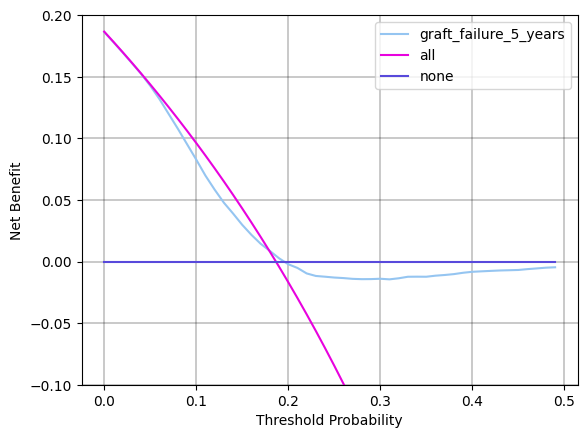

In [26]:
stdca_coxph_results = \
          dca(
              data=df_validate,
              outcome='REC_GRAFT_STAT',
              modelnames=['graft_failure_5_years'],
              thresholds=np.arange(0, 0.5, 0.01),
              time=5,
              time_to_outcome_col='Graft_Survival_Time'
          )
  
plot_graphs(
    plot_df=stdca_coxph_results,
    graph_type='net_benefit',
    y_limits=[-0.1, 0.2]
  )

In [27]:
coefficients = cph1.params_
print(coefficients)

covariate
DON_AGE                           0.010374
DON_CREAT                         0.042246
DON_HIST_HTN                      0.102697
DON_HIST_DB                       0.225678
DON_COD_DON_STROKE                0.137042
DON_ANTI_HCV                      0.269831
DON_HGT_CM                       -0.006655
DON_WGT_KG                       -0.001047
DON_CARDIAC_ARREST_AFTER_DEATH   -0.189164
REC_B_MM_EQUIV_TX                -0.003227
REC_DR_MM_EQUIV_TX                0.069466
REC_COLD_ISCH_TM                  0.009245
EN_BLOC                          -0.061626
REC_AGE_AT_TX                     0.007000
REC_DIAB                          0.323566
REC_HTN                          -0.248068
CAN_RACE_SRTR                     0.124055
REC_DGN                          -0.000020
CAN_PREV_TXFUS                   -0.105507
CAN_WGT_KG                        0.003240
CAN_LAST_SRTR_PEAK_PRA            0.001236
REC_DIAL_YRS                      0.038666
CAN_ANGINA                       -0.292471
C

In [28]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

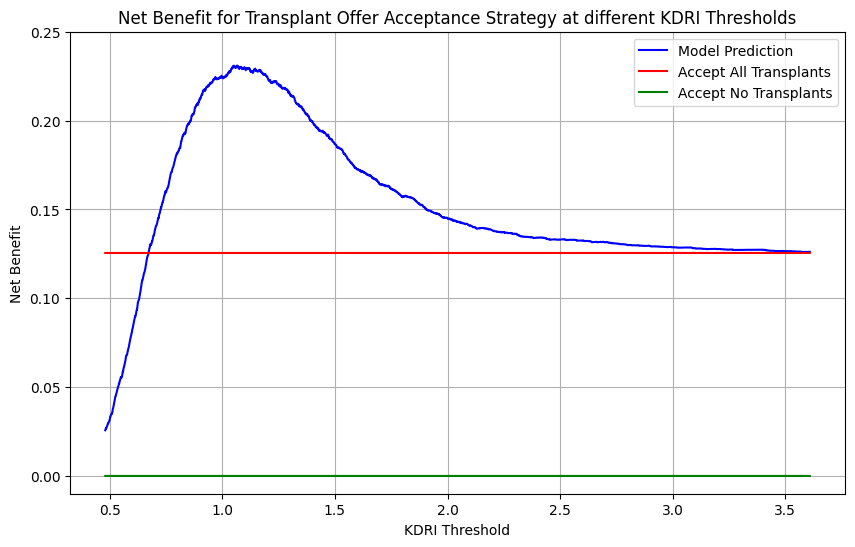

In [30]:
# Set threshold range for KDRI
kdri_thresholds = np.arange(0.48, 3.61, 0.001)  # Thresholds to evaluate (based on 2010 OPTN mapp8ing table)
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefit values for each strategy
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Set the desired probability threshold for survival benefit (e.g., 83% threshold for net benefit calculation)
desired_probability = 0.83
odds_ratio = desired_probability / (1 - desired_probability)  # Converts 0.83 to an odds ratio

# Precompute total positives (graft survivals) and negatives (graft failures) in the data
total_negatives = df_validate['REC_GRAFT_STAT'].sum()  # Total graft failures
total_positives = N - total_negatives  # Total graft survivals

# Precompute "Accept All" net benefit value, since it doesn't change across thresholds
TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # Actual graft failures
net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * odds_ratio

# Loop over each threshold in kdri_thresholds
for threshold in kdri_thresholds:
    # Vectorized calculations for TP and FP based on the current threshold
    is_below_threshold = df_validate['KDRI'] < threshold
    TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # True Positives (survivals correctly identified)
    FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()  # False Positives (failures incorrectly predicted as survivals)

    # Calculate net benefit for model strategy at the current threshold
    net_benefit_model_value = (TP / N) - (FP / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # Store "Accept All" and "Accept None" values
    net_benefit_accept_all.append(net_benefit_accept_all_value)
    net_benefit_accept_none.append(0)  # Always zero for "Accept None" strategy

# Plot the results for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(kdri_thresholds, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(kdri_thresholds, net_benefit_accept_all, 'r-', label='Accept All Transplants')
plt.plot(kdri_thresholds, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("KDRI Threshold")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy at different KDRI Thresholds")
plt.ylim(-0.01, 0.25)
plt.legend()
plt.grid(True)
plt.show()



 ## Donor-Recipient w/o Race or HCV Status

In [31]:
df_train = df_validate.drop('DON_ANTI_HCV', axis=1)
df_validate = df_validate.drop('DON_ANTI_HCV', axis=1)

In [32]:
# Donor Recipient model without race term

cph2 = CoxPHFitter()

cph2.fit(
    df_train,
    'Graft_Survival_Time',
    'REC_GRAFT_STAT',
    strata=['REC_CTR_CD'],
    show_progress=True,
    formula=( "DON_AGE  + DON_CREAT + DON_HIST_HTN + DON_HIST_DB + DON_COD_DON_STROKE + DON_HGT_CM + DON_WGT_KG + DON_CARDIAC_ARREST_AFTER_DEATH + REC_B_MM_EQUIV_TX + REC_DR_MM_EQUIV_TX + REC_COLD_ISCH_TM + EN_BLOC + REC_AGE_AT_TX + REC_DIAB + REC_HTN + CAN_RACE_SRTR + REC_DGN + CAN_PREV_TXFUS + CAN_WGT_KG + CAN_LAST_SRTR_PEAK_PRA + REC_DIAL_YRS + CAN_ANGINA + CAN_PERIPH_VASC + REC_HCV_STAT + DOUBLE_KI")
)

cph2.print_summary()

Iteration 1: norm_delta = 3.44e-01, step_size = 0.9500, log_lik = -28886.21442, newton_decrement = 4.02e+02, seconds_since_start = 0.9
Iteration 2: norm_delta = 3.56e-02, step_size = 0.9500, log_lik = -28501.35002, newton_decrement = 4.37e+00, seconds_since_start = 1.8
Iteration 3: norm_delta = 2.40e-03, step_size = 0.9500, log_lik = -28496.93228, newton_decrement = 2.55e-02, seconds_since_start = 2.6
Iteration 4: norm_delta = 9.09e-06, step_size = 1.0000, log_lik = -28496.90673, newton_decrement = 4.60e-07, seconds_since_start = 3.4
Iteration 5: norm_delta = 2.52e-10, step_size = 1.0000, log_lik = -28496.90673, newton_decrement = 3.22e-16, seconds_since_start = 4.2
Convergence success after 5 iterations.


<lifelines.CoxPHFitter: fitted with 37816 total observations, 32194 right-censored observations>
             duration col = 'Graft_Survival_Time'
                event col = 'REC_GRAFT_STAT'
                   strata = REC_CTR_CD
      baseline estimation = breslow
   number of observations = 37816
number of events observed = 5622
   partial log-likelihood = -28496.91
         time fit was run = 2024-11-12 12:22:57 UTC

---
                                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                       
DON_AGE                         0.01      1.01      0.00            0.01            0.01                1.01                1.01
DON_CREAT                       0.04      1.04      0.02           -0.00            0.08                1.00                1.09
DON_HIST_HTN                    0.10      1.11      0.03            0.04            0.16                1.04                1.18
DON_HIST_DB                     0.22      1.25      0.05            0.13            0.31                1.14                1.37
DON_COD_DON_STROKE              0.14      1.15      0.03            0.08            0.20                1.08                1.22
DON_HGT_CM                     -0.01      0.99      0.00           -0.01           -0.00                0.99                1.00
DON_WGT_KG                     -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
DON_CARDIAC_ARREST_AFTER_DEATH -0.19      0.83      0.07           -0.32           -0.06                0.73                0.94
REC_B_MM_EQUIV_TX              -0.00      1.00      0.02           -0.05            0.04                0.95                1.04
REC_DR_MM_EQUIV_TX              0.07      1.07      0.02            0.03            0.11                1.03                1.12
REC_COLD_ISCH_TM                0.01      1.01      0.00            0.01            0.01                1.01                1.01
EN_BLOC                        -0.06      0.94      0.14           -0.33            0.20                0.72                1.23
REC_AGE_AT_TX                   0.01      1.01      0.00            0.00            0.01                1.00                1.01
REC_DIAB                        0.32      1.38      0.05            0.22            0.42                1.25                1.52
REC_HTN                        -0.25      0.78      0.05           -0.34           -0.16                0.71                0.85
CAN_RACE_SRTR                   0.13      1.14      0.03            0.07            0.19                1.07                1.21
REC_DGN                        -0.00      1.00      0.00           -0.00            0.00                1.00                1.00
CAN_PREV_TXFUS                 -0.11      0.90      0.17           -0.45            0.23                0.64                1.26
CAN_WGT_KG                      0.00      1.00      0.00            0.00            0.00                1.00                1.00
CAN_LAST_SRTR_PEAK_PRA          0.00      1.00      0.00            0.00            0.00                1.00                1.00
REC_DIAL_YRS                    0.04      1.04      0.00            0.03            0.05                1.03                1.05
CAN_ANGINA                     -0.29      0.75      0.08           -0.44           -0.14                0.64                0.87
CAN_PERIPH_VASC                 0.27      1.31      0.06            0.16            0.38                1.17                1.46
REC_HCV_STAT                    0.13      1.14      0.06            0.02            0.24                1.02                1.27
DOUBLE_KI                      -0.25      0.78      0.11           -0.46           -0.03                0.63                0.97

                                cmp to     z      p  -log2(p)
covariate                

In [33]:
coefficients = cph2.params_
print(coefficients)

covariate
DON_AGE                           0.010338
DON_CREAT                         0.039948
DON_HIST_HTN                      0.100284
DON_HIST_DB                       0.223221
DON_COD_DON_STROKE                0.137605
DON_HGT_CM                       -0.006539
DON_WGT_KG                       -0.001072
DON_CARDIAC_ARREST_AFTER_DEATH   -0.188541
REC_B_MM_EQUIV_TX                -0.002681
REC_DR_MM_EQUIV_TX                0.071377
REC_COLD_ISCH_TM                  0.009339
EN_BLOC                          -0.063049
REC_AGE_AT_TX                     0.007052
REC_DIAB                          0.320048
REC_HTN                          -0.246605
CAN_RACE_SRTR                     0.128179
REC_DGN                          -0.000021
CAN_PREV_TXFUS                   -0.107593
CAN_WGT_KG                        0.003226
CAN_LAST_SRTR_PEAK_PRA            0.001199
REC_DIAL_YRS                      0.038029
CAN_ANGINA                       -0.291326
CAN_PERIPH_VASC                   0.268589
R

In [34]:
# Define a function to calculate KDRI for a given donor's data row
def calculate_kdri(row, coefficients):
    log_hazard = sum(coefficients[var] * row[var] for var in coefficients.index)
    kdri = np.exp(log_hazard)
    return kdri

# Apply the function to your dataset
df_validate['KDRI'] = df_validate.apply(lambda row: calculate_kdri(row, coefficients), axis=1)


#Calculate KDPI: 
# Function to calculate KDPI from KDRI using the reference distribution
reference_kdri = np.sort(df_validate['KDRI'].values)

def calculate_kdpi(kdri, reference_kdri):
    # Calculate the percentile rank (KDPI) for the given KDRI
    percentile = (np.sum(reference_kdri <= kdri) / len(reference_kdri)) * 100
    return percentile

# Apply the function to your dataset to create the KDPI column
df_validate['KDPI'] = df_validate['KDRI'].apply(lambda x: calculate_kdpi(x, reference_kdri))

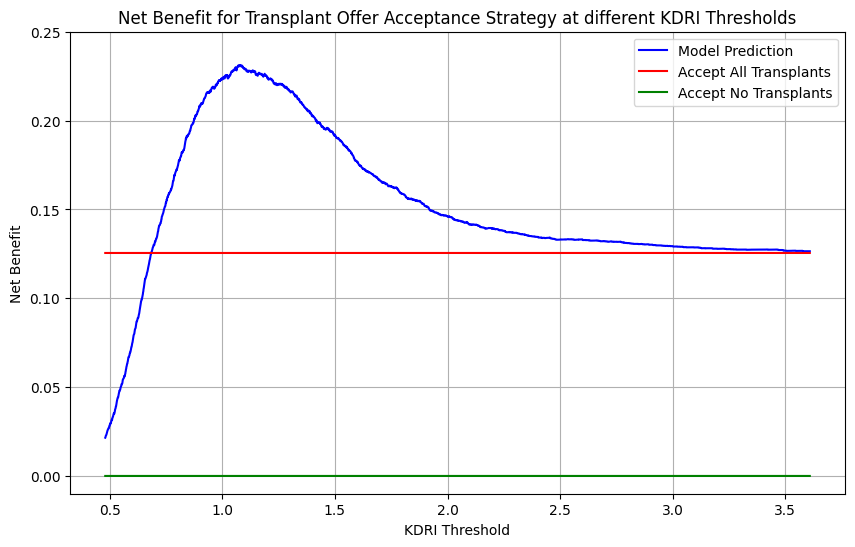

In [35]:
# Set threshold range for KDRI
kdri_thresholds = np.arange(0.48, 3.61, 0.001)  # Thresholds to evaluate (based on 2010 OPTN mapp8ing table)
N = len(df_validate)  # Total number of patients

# Initialize lists to store net benefit values for each strategy
net_benefit_model = []
net_benefit_accept_all = []
net_benefit_accept_none = []  # Always 0 as no transplants are accepted

# Set the desired probability threshold for survival benefit (e.g., 83% threshold for net benefit calculation)
desired_probability = 0.83
odds_ratio = desired_probability / (1 - desired_probability)  # Converts 0.83 to an odds ratio

# Precompute total positives (graft survivals) and negatives (graft failures) in the data
total_negatives = df_validate['REC_GRAFT_STAT'].sum()  # Total graft failures
total_positives = N - total_negatives  # Total graft survivals

# Precompute "Accept All" net benefit value, since it doesn't change across thresholds
TP_accept_all = (df_validate['REC_GRAFT_STAT'] == 0).sum()  # Correctly predicted graft survivals
FN_accept_all = (df_validate['REC_GRAFT_STAT'] == 1).sum()  # Actual graft failures
net_benefit_accept_all_value = (TP_accept_all / N) - (FN_accept_all / N) * odds_ratio

# Loop over each threshold in kdri_thresholds
for threshold in kdri_thresholds:
    # Vectorized calculations for TP and FP based on the current threshold
    is_below_threshold = df_validate['KDRI'] < threshold
    TP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 0)).sum()  # True Positives (survivals correctly identified)
    FP = ((is_below_threshold) & (df_validate['REC_GRAFT_STAT'] == 1)).sum()  # False Positives (failures incorrectly predicted as survivals)

    # Calculate net benefit for model strategy at the current threshold
    net_benefit_model_value = (TP / N) - (FP / N) * odds_ratio
    net_benefit_model.append(net_benefit_model_value)

    # Store "Accept All" and "Accept None" values
    net_benefit_accept_all.append(net_benefit_accept_all_value)
    net_benefit_accept_none.append(0)  # Always zero for "Accept None" strategy

# Plot the results for different thresholds
plt.figure(figsize=(10, 6))
plt.plot(kdri_thresholds, net_benefit_model, 'b-', label='Model Prediction')
plt.plot(kdri_thresholds, net_benefit_accept_all, 'r-', label='Accept All Transplants')
plt.plot(kdri_thresholds, net_benefit_accept_none, 'g-', label='Accept No Transplants')

plt.xlabel("KDRI Threshold")
plt.ylabel("Net Benefit")
plt.title("Net Benefit for Transplant Offer Acceptance Strategy at different KDRI Thresholds")
plt.ylim(-0.01, 0.25)
plt.legend()
plt.grid(True)
plt.show()

